## Competition - Spooky Author Identification
**Identify horror authors from their writings**

**File descriptions**

    train.csv - the training set
    test.csv - the test set
    sample_submission.csv - a sample submission file in the correct format

**Data fields**

    id - a unique identifier for each sentence
    text - some text written by one of the authors
    author - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)


# Bag of Words

## This notebook inlcudes the Bag of Words approach for feature extraction, bechmarking of different classifers, preparing submissions to Kaggle

## References
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py

http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

http://scikit-learn.org/dev/auto_examples/model_selection/grid_search_text_feature_extraction.html

http://scikit-learn.org/stable/modules/feature_extraction.html#applications-and-examples

http://scikit-learn.org/stable/modules/ensemble.html#using-the-votingclassifier-with-gridsearch

https://www.kaggle.com/marcospinaci/talking-plots-1-sklearn-classifiers-0-334

## Environment Setup

In [170]:
# Common import
import numpy as np
import pandas as pd
import os
import itertools

# Set graph parameters
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set path to save visualizations
PROJECT_DIR = "."
IMAGES_DIR = "images"

# Function to save visualizations
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_DIR, IMAGES_DIR, fig_id + ".png")
    print(path)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Load the dataset

In [171]:
# Set the path of the spooky author dataset
SPOOKY_PATH = 'spooky'


def load_spooky_dataset(dataset_type):
    filepath = os.path.join(SPOOKY_PATH, dataset_type, dataset_type + ".csv")
    print(filepath)
    return pd.read_csv(filepath)

In [172]:
train = load_spooky_dataset("train")
train.head()

spooky\train\train.csv


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [173]:
test = load_spooky_dataset("test")
test.head()

spooky\test\test.csv


,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 2 columns):
id      8392 non-null object
text    8392 non-null object
dtypes: object(2)
memory usage: 131.2+ KB


## Split dataset for training and testing

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['author'])
#X_train, y_train = train['text'], train['author']
#X_test = test['text']
#X_ID = test['id']

In [302]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14684,) (4895,) (14684,) (4895,)


## Extracting features from text - Bag of Words approach

### Tokenizing Text

In [303]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape, X_train.shape

((14684, 22082), (14684,))

In [304]:
print(X_train_counts[0])

  (0, 5694)	1
  (0, 15111)	1
  (0, 11295)	1
  (0, 7101)	1
  (0, 19565)	1
  (0, 4775)	1
  (0, 4778)	1


### Occurences to frequencies - Term Frequency times Inverse Document Frequency

In [305]:
from sklearn.feature_extraction.text import  TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(14684, 22082)

In [306]:
print(X_train_tfidf[0])

  (0, 4778)	0.251038917494
  (0, 4775)	0.393671188645
  (0, 19565)	0.255879097696
  (0, 7101)	0.456917074663
  (0, 11295)	0.281321257897
  (0, 15111)	0.382529390885
  (0, 5694)	0.531304758441


### Train a classifier

In [307]:
# Mutlinomial variant of Naive Bayes provides a good baseline for word counts
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluation of performance on test set

In [308]:
# Prediction on test set
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tf_transformer.transform(X_test_counts)
X_test.shape, X_test_tfidf.shape

((4895,), (4895, 22082))

In [309]:
y_pred = clf.predict(X_test_tfidf)

In [310]:
# Accuracy
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Accuracy:", np.mean(y_pred == y_test))

Accuracy Score: 0.811235955056
Accuracy: 0.811235955056


In [311]:
# Log loss
from sklearn.metrics import log_loss

y_pred_prob = clf.predict_proba(X_test_tfidf)

print("Log Loss:", log_loss(y_test, y_pred_prob))

Log Loss: 0.604572239607


In [312]:
# Baseline submission
#create_submission_file(y_pred_prob, 'MNB_Baseline')

In [313]:
# Detailed report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        EAP       0.75      0.88      0.81      1964
        HPL       0.90      0.72      0.80      1434
        MWS       0.83      0.81      0.82      1497

avg / total       0.82      0.81      0.81      4895



In [314]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[1735,   82,  147],
       [ 308, 1027,   99],
       [ 257,   31, 1209]], dtype=int64)

In [315]:
# Plot confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_conf_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

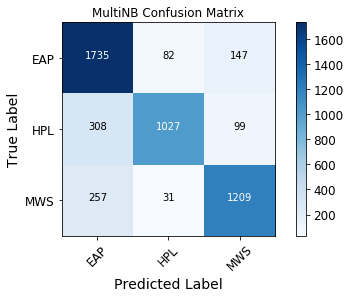

In [316]:
plot_conf_matrix(conf_mx, train.author.unique(), title="MultiNB Confusion Matrix")

## Building a pipeline

In [194]:
from sklearn.pipeline import Pipeline

# Pipeline features - vectorizer -> transformer -> classifier
# CountVectorizer - Text Preprocessing, tokenizing, and filtering of stopwords - dictionary of feature indices
# TfidfTransformer - Term frequencies, and downscaling weights for words - tf and tf-idf
# MultinomialNB - Naive Bayes Classifier - multinomial variant classifier

mnb_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [195]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [196]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.802655771195
Log Loss: 0.60978207366


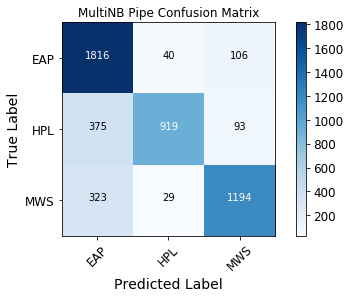

In [197]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="MultiNB Pipe Confusion Matrix")

## Parameter Tuning with grid search cv

In [255]:
# http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (1e-2, 1e-3),
}

In [256]:
mnb_gs_clf = GridSearchCV(mnb_clf, parameters, n_jobs=-1)

In [257]:
mnb_gs_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [258]:
mnb_gs_clf.best_score_

0.83594388450013624

In [259]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, mnb_gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__norm: 'l2'
tfidf__use_idf: False
vect__max_df: 0.5
vect__max_features: None
vect__ngram_range: (1, 2)


In [260]:
y_pred = mnb_gs_clf.best_estimator_.predict(X_test)
y_pred_prob = mnb_gs_clf.best_estimator_.predict_proba(X_test)

In [261]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.862717058223
Log loss: 0.354775708031


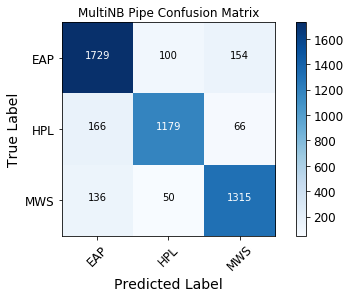

In [262]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="MultiNB Pipe Confusion Matrix")

In [263]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__n_iter': (10, 50, 80),
}

In [264]:
sgd_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

In [265]:
sgd_clf_gs = GridSearchCV(sgd_clf, parameters, n_jobs=-1)

In [266]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14684,) (4895,) (14684,) (4895,)


In [267]:
sgd_clf_gs.fit(X_train, y_train)

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet'), 'clf__n_iter': (10, 50, 80)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [268]:
sgd_clf_gs.best_score_

0.81742032143830023

In [269]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, sgd_clf_gs.best_params_[param_name]))

clf__alpha: 1e-05
clf__n_iter: 80
clf__penalty: 'l2'
tfidf__norm: 'l2'
tfidf__use_idf: True
vect__max_df: 1.0
vect__max_features: None
vect__ngram_range: (1, 2)


In [270]:
y_pred = sgd_clf_gs.best_estimator_.predict(X_test)

In [271]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.845965270684


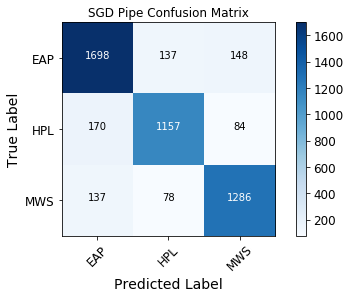

In [272]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="SGD Pipe Confusion Matrix")

In [273]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__tol': (1e-2, 1e-3, 1e-4),
    'clf__C': (1, 10, 100, 1000),
}

In [274]:
svc_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [275]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14684,) (4895,) (14684,) (4895,)


In [276]:
svc_clf_gs = GridSearchCV(svc_clf, parameters, n_jobs=-1)

In [277]:
svc_clf_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__tol': (0.01, 0.001, 0.0001), 'clf__C': (1, 10, 100, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [278]:
svc_clf_gs.best_score_

0.81803323345137569

In [279]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, svc_clf_gs.best_params_[param_name]))

clf__C: 1000
clf__tol: 0.01
tfidf__norm: 'l2'
tfidf__use_idf: True
vect__max_df: 0.75
vect__max_features: None
vect__ngram_range: (1, 2)


In [284]:
y_pred = mnb_gs_clf.best_estimator_.predict(X_test)
y_pred_prob = mnb_gs_clf.best_estimator_.predict_proba(X_test)

In [285]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.862717058223
Log loss: 0.354775708031


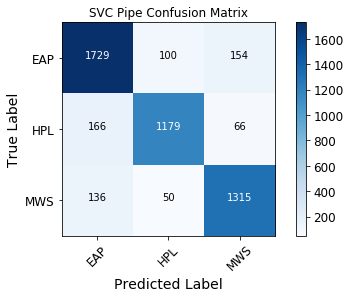

In [286]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="SVC Pipe Confusion Matrix")

### GridSearch Parameters
    MNB
    clf__alpha: 0.01
    clf__alpha: 0.01
    tfidf__norm: 'l2'
    tfidf__use_idf: False
    vect__max_df: 0.5
    vect__max_features: None
    vect__ngram_range: (1, 2)

    SGD
    clf__alpha: 1e-05
    clf__n_iter: 50
    clf__penalty: 'l2'
    tfidf__norm: 'l2'
    tfidf__use_idf: True
    vect__max_df: 1.0
    vect__max_features: None
    vect__ngram_range: (1, 2)

    SVC
    clf__C: 10
    clf__tol: 0.01
    tfidf__norm: 'l2'
    tfidf__use_idf: True
    vect__max_df: 0.75
    vect__max_features: None
    vect__ngram_range: (1, 2)

## Try different classifiers
http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py


In [412]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils.extmath import density

target_names = train.author.unique()
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['author'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(14684,) (4895,) (14684,) (4895,)


In [413]:
print("Extracting features from training data using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
duration = time() - t0
print(duration)
print(X_train.shape)
print(X_test.shape)

Extracting features from training data using a sparse vectorizer
0.4792783260345459
(14684, 22389)
(4895, 22389)


In [414]:
feature_names = vectorizer.get_feature_names()
if feature_names:
    feature_names = np.asarray(feature_names)

feature_names

array(['ab', 'aback', 'abaft', ..., 'élite', 'οἶδα', 'υπνος'],
      dtype='<U19')

In [415]:
print(vectorizer.get_stop_words())

None


In [416]:
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("Training time: %0.3fs" % train_time)
    
    t0 = time()
    pred = clf.predict(X_test)
    #pred_prob = clf.predict_proba(X_test)
    
    
    score = accuracy_score(y_test, pred)
    
    
    
    
    if hasattr(clf, "predict_proba"):
        pred_prob = clf.predict_proba(X_test)
    else:
        pred_prob = clf.decision_function(X_test)
        pred_prob = (pred_prob - pred_prob.min()) / (pred_prob.max() - pred_prob.min())
    
    
    lnloss = log_loss(y_test, pred_prob)
    test_time = time() - t0
    print("Testing time: %0.3fs" % test_time)
    print("Accuracy score: %0.3f" % score)
    print("Log loss: %0.3f" % lnloss)
    
    
    if hasattr(clf, 'coef_'):
        print("Dimensionality: %d" % clf.coef_.shape[1])
        print("Density: %f" % density(clf.coef_))
        
        if feature_names is not None:
            print("Top 10 keywords per class: ")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print("%s: %s" % (label, " ".join(feature_names[top10])))
            print()
    print("Classification Report:")
    print(classification_report(y_test, pred, target_names=target_names))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    
    print()
    clf_desc = str(clf).split('(')[0]
    return clf_desc, score, train_time, test_time
    

In [417]:
results = []

for clf, name in (
    (LogisticRegression(multi_class="multinomial", solver='lbfgs', C=0.1), "LR"),
    #(RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
    #(KNeighborsClassifier(n_neighbors=10), "kNN"),
    #(RandomForestClassifier(n_estimators=100), "Random forest")
):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))
    
for penalty in ['l2', 'l1']:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # LibLinear Model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))
    # SGD Model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50, penalty=penalty)))
    
# SGD with Elastic-Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet")))

# Train Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1 based regularization")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity
results.append(benchmark(Pipeline([
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))),
    ('classification', LinearSVC(penalty="l2"))
])))

print('=' * 80)
results.append(benchmark(Pipeline([
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))),
    ('classification', MultinomialNB(alpha=.01))
])))

LR
________________________________________________________________________________
Training 
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Training time: 0.654s
Testing time: 0.015s
Accuracy score: 0.743
Log loss: 0.803
Dimensionality: 22389
Density: 1.000000
Top 10 keywords per class: 
EAP: say no has very it at have however is upon
HPL: men they street things west seemed and had old though
MWS: on perdita our love you me she raymond my her

Classification Report:
             precision    recall  f1-score   support

        EAP       0.68      0.87      0.76      1949
        HPL       0.81      0.66      0.73      1423
        MWS       0.81      0.66      0.73      1523

avg / total       0.76      0.74      0.74      4895

Confusion Matrix:
[[1696  104  149]
 [

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Training time: 0.333s
Testing time: 0.015s
Accuracy score: 0.830
Log loss: 0.840
Dimensionality: 22389
Density: 0.827683
Top 10 keywords per class: 
EAP: immediately altogether is balloon minutes dupin madame however lady upon
HPL: uncle old whilst street innsmouth gilman despite later west though
MWS: quitted misery love plague idris her perdita towards adrian raymond

Classification Report:
             precision    recall  f1-score   support

        EAP       0.81      0.85      0.83      1949
        HPL       0.85      0.82      0.83      1423
        MWS       0.85      0.81      0.83      1523

avg / total       0.83      0.83      0.83      4895

Confusion Matrix:
[[1660  133  156]
 [ 183 1171   69]
 [ 212   81 1230]]

L1 penalty
________________________________________________________________________________
Training 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penal

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Training time: 0.855s
Testing time: 0.017s
Accuracy score: 0.782
Log loss: 0.940
Dimensionality: 22389
Density: 0.049995
Top 10 keywords per class: 
EAP: gentleman altogether evident minutes dupin however lady balloon madame upon
HPL: uncle birch amongst innsmouth gilman west whilst later though despite
MWS: labours love labour windsor misery towards idris perdita adrian raymond

Classification Report:
             precision    recall  f1-score   support

        EAP       0.75      0.83      0.79      1949
        HPL       0.81      0.75      0.78      1423
        MWS       0.81      0.75      0.78      1523

avg / total       0.78      0.78      0.78      4895

Confusion Matrix:
[[1625  145  179]
 [ 265 1061   97]
 [ 273  109 1141]]

Elastic-Net penalty
________________________________________________________________________________
Training 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learnin

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Training time: 0.932s
Testing time: 0.018s
Accuracy score: 0.823
Log loss: 0.859
Dimensionality: 22389
Density: 0.462549
Top 10 keywords per class: 
EAP: character balloon is altogether minutes dupin madame however lady upon
HPL: birch uncle whilst gilman innsmouth street despite later west though
MWS: miserable misery plague love idris her perdita towards adrian raymond

Classification Report:
             precision    recall  f1-score   support

        EAP       0.80      0.85      0.82      1949
        HPL       0.84      0.81      0.82      1423
        MWS       0.84      0.80      0.82      1523

avg / total       0.82      0.82      0.82      4895

Confusion Matrix:
[[1652  135  162]
 [ 195 1153   75]
 [ 215   86 1222]]

Naive Bayes
________________________________________________________________________________
Training 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
Training time: 0.043s
Testing time: 0.019s
Accuracy score: 0.833
Log loss: 0.426
Dimensionality: 

In [385]:
# Plots of the benchmark acitivty
indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, testing_time = results
training_time = np.array(training_time) / np.max(training_time)
testing_time = np.array(testing_time) / np.max(testing_time)

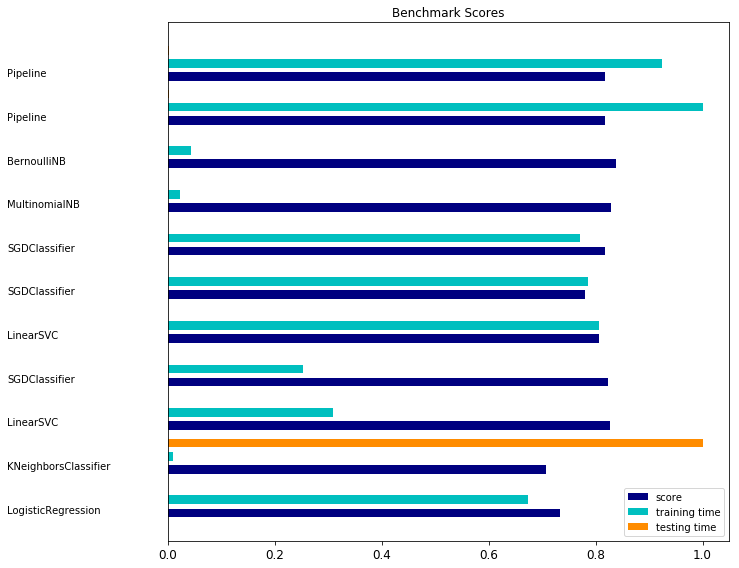

In [386]:
plt.figure(figsize=(12, 8))
plt.title("Benchmark Scores")
plt.barh(indices, score, .2, label="score", color="navy")
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, testing_time, .2, label="testing time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)
    
plt.show()

## VotingClassifier
http://scikit-learn.org/stable/modules/ensemble.html#using-the-votingclassifier-with-gridsearch

In [317]:
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['author'])

In [318]:
pipeline_tuned = Pipeline([
    ('vect', CountVectorizer(stop_words='english',ngram_range=(1,2), max_features=None, max_df=0.75)),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
])

In [319]:
X_train_transformed = pipeline_tuned.fit_transform(X_train)

In [320]:
from sklearn.ensemble import VotingClassifier

clf1 = SGDClassifier(alpha=1e-05, n_iter=50, penalty='l2', loss='log')
clf2 = MultinomialNB(alpha=0.01)
eclf = VotingClassifier(estimators=[('svc', clf1), ('mnb', clf2)], voting='soft')


In [321]:
eclf.fit(X_train_transformed, y_train)

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


VotingClassifier(estimators=[('svc', SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)), ('mnb', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [322]:
X_test_transformed = pipeline_tuned.transform(X_test)

In [323]:
y_pred = eclf.predict(X_test_transformed)

In [324]:
y_pred_prob = eclf.predict_proba(X_test_transformed)

In [325]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.835137895812
Log loss: 0.435931677036


In [326]:
# Submission
#create_submission_file(y_pred_prob, 'VC_SGD_MNB')

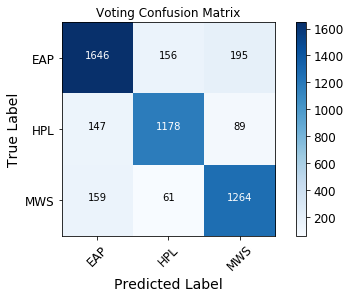

In [327]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="Voting Confusion Matrix")

## Prepare submission file

In [238]:
def create_submission_file(y_pred_prob, name):
    result = pd.DataFrame(y_pred_prob, columns=['EAP', 'HPL', 'MWS'])
    result.insert(0, 'id', X_ID)
    result.to_csv(name+'.csv', index=False, float_format='%.20f')

## Train and test using grid searched params

### MNB

In [328]:
# MNB
# clf__alpha: 0.01
# tfidf__norm: 'l2'
# tfidf__use_idf: False
# vect__max_df: 0.5
# vect__max_features: None
# vect__ngram_range: (1, 2)

mnb_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english',max_df=0.5, max_features=None, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=False)),
    ('clf', MultinomialNB(alpha=.01)),
])


In [329]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        ...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [330]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)

In [331]:
#create_submission_file(y_pred_prob, 'MNB_GS')
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.835137895812
Log loss: 0.406560686329


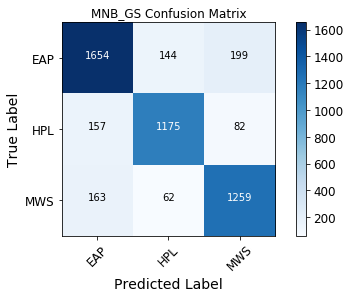

In [332]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="MNB_GS Confusion Matrix")

### SGD

In [333]:
#SGD
#clf__alpha: 1e-05
#clf__n_iter: 50
#clf__penalty: 'l2'
#tfidf__norm: 'l2'
#tfidf__use_idf: True
#vect__max_df: 1.0
#vect__max_features: None
#vect__ngram_range: (1, 2)

sgd_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_df=1.0, max_features=None, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
    ('clf', SGDClassifier(alpha=1e-05, n_iter=50, penalty='l2', loss='log'))
])


In [334]:
sgd_clf.fit(X_train, y_train)

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        ...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [335]:
y_pred = sgd_clf.predict(X_test)
y_pred_prob = sgd_clf.predict_proba(X_test)

In [336]:
#create_submission_file(y_pred_prob, 'SGD_GS')
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.794484167518
Log loss: 0.524887624206


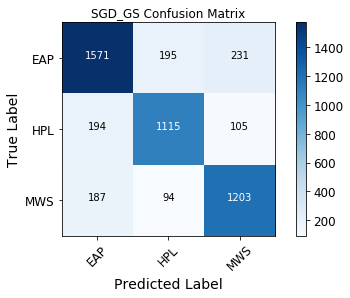

In [337]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="SGD_GS Confusion Matrix")

### LinearSVC

In [338]:
#SVC
#clf__C: 10
#clf__tol: 0.01
#tfidf__norm: 'l2'
#tfidf__use_idf: True
#vect__max_df: 0.75
#vect__max_features: None
#vect__ngram_range: (1, 2)

svc_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_df=0.75, max_features=None, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
    ('clf', LinearSVC(C=10, tol=.01))
])

In [339]:
svc_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
       ... max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.01,
     verbose=0))])

In [340]:
y_pred = svc_clf.predict(X_test)
y_pred_prob = svc_clf.decision_function(X_test)

In [341]:
y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
y_pred_prob
#create_submission_file(y_pred_prob, 'SVC_GS_DF')

array([[ 0.4353762 ,  0.29434548,  0.49251073],
       [ 0.56797108,  0.31440796,  0.35121762],
       [ 0.40559099,  0.37706917,  0.44071232],
       ..., 
       [ 0.60843503,  0.24479689,  0.35994589],
       [ 0.26461942,  0.65582368,  0.28677993],
       [ 0.35962621,  0.28986402,  0.56813929]])

In [342]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.80531154239
Log loss: 0.84140525687


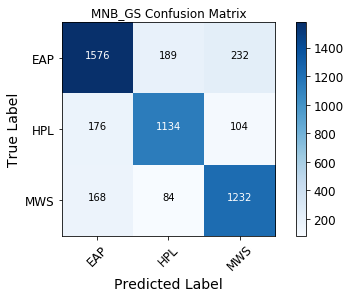

In [343]:
# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="MNB_GS Confusion Matrix")